# Data Mining Analysis of mechanisms- based classification of musculoskeletal pain in clinical practice 

## Dataset: 
The data from this study are a sample of 464 patients, each one assigned to one of the three types of pain by a group of experienced physiotherapists. The assessment was carried out according to a list of 36 binary clinical indicators (“Present”/“Absent”). These indicators are selected on an expert consensus basis regarding symptoms and features of the patients.

## Our Study: 

1. Are there any interesting patterns in the presence/absence clinical criteria for lower back pain? <br>
2. Do the patients form groups with similar presence/absence clinical criteria? Do these groups have a connection with the clinical pain types?
3. Can we use the presence/absence clinical criteria to accurately predict the clinical pain types?




## Implementing Association Rules mining to find the frequent symptoms

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('dataupdated.csv')

### Data Preprocessing

In [3]:
data.head()

,No,recent_pain,assoc_trauma,nerve_injury_history,X4,disp_pain,intermitt,burning,localised,referred,...,non_mechanical,pos_neurological,local_palpation,Diffuse,allodynia,hyperalgesia,hyperpathia,palpation_neural_tissues,identification_psychosocial,assignedlabels
0,1,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,Nociceptive
1,2,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Nociceptive
2,3,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,1,0,0,Nociceptive
3,4,0,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,PeripheralNeuropathic
4,5,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Nociceptive


In [4]:
data.columns

Index(['No', 'recent_pain', 'assoc_trauma', 'nerve_injury_history', 'X4',
       'disp_pain', 'intermitt', 'burning', 'localised', 'referred',
       'widespread', 'mech_nature', 'mech_movement', 'disproportionate',
       'spont', 'dyesthesias', 'high_sev', 'neurological_symp', 'night_pain',
       'NSAIDS', 'rapid_resolve', 'pain_persist', 'history_failed',
       'psychosocial', 'functional', 'Antalgic', 'Consistent',
       'compress_neural_tissue', 'non_mechanical', 'pos_neurological',
       'local_palpation', 'Diffuse', 'allodynia', 'hyperalgesia',
       'hyperpathia', 'palpation_neural_tissues',
       'identification_psychosocial', 'assignedlabels'],
      dtype='object')

In [5]:
data.describe()

,No,recent_pain,assoc_trauma,nerve_injury_history,X4,disp_pain,intermitt,burning,localised,referred,...,compress_neural_tissue,non_mechanical,pos_neurological,local_palpation,Diffuse,allodynia,hyperalgesia,hyperpathia,palpation_neural_tissues,identification_psychosocial
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,...,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,232.500000,0.150862,0.719828,0.327586,0.243534,0.767241,0.232759,0.370690,0.696121,0.310345,...,0.318966,0.193966,0.215517,0.696121,0.183190,0.090517,0.303879,0.221983,0.221983,0.293103
std,134.089522,0.358301,0.449568,0.469840,0.429678,0.423046,0.423046,0.483511,0.460428,0.463134,...,0.466579,0.395829,0.411624,0.460428,0.387239,0.287231,0.460428,0.416028,0.416028,0.455677
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,232.500000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,348.250000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,464.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.count()

No                             464
recent_pain                    464
assoc_trauma                   464
nerve_injury_history           464
X4                             464
disp_pain                      464
intermitt                      464
burning                        464
localised                      464
referred                       464
widespread                     464
mech_nature                    464
mech_movement                  464
disproportionate               464
spont                          464
dyesthesias                    464
high_sev                       464
neurological_symp              464
night_pain                     464
NSAIDS                         464
rapid_resolve                  464
pain_persist                   464
history_failed                 464
psychosocial                   464
functional                     464
Antalgic                       464
Consistent                     464
compress_neural_tissue         464
non_mechanical      

In [7]:
data_2 = data.drop([ 'assignedlabels',"No"], axis=1)


The first 36 columns in the data matrix indicated the absence or presence of a pain type. Each code
referred to a pain described. The assigned.label column indicated the clinical assignment in
one of three categories Nociceptive (NP), Peripheral Neuropathic (PN) and Central Sensitization (CN)

In [8]:
data_2.head()

,recent_pain,assoc_trauma,nerve_injury_history,X4,disp_pain,intermitt,burning,localised,referred,widespread,...,compress_neural_tissue,non_mechanical,pos_neurological,local_palpation,Diffuse,allodynia,hyperalgesia,hyperpathia,palpation_neural_tissues,identification_psychosocial
0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
3,0,1,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Getting some more insights of Data.
#### Finding the afftected and non affected patients 

In [9]:
Total_affected_and_not_affected = data_2.apply(pd.value_counts).fillna(0).sum(axis=1)

most_common = data_2.apply(pd.value_counts).fillna(0)



In [10]:
Total_affected_and_not_affected.head()

0    10718
1     5986
dtype: int64

In [11]:
most_common.head()

,recent_pain,assoc_trauma,nerve_injury_history,X4,disp_pain,intermitt,burning,localised,referred,widespread,...,compress_neural_tissue,non_mechanical,pos_neurological,local_palpation,Diffuse,allodynia,hyperalgesia,hyperpathia,palpation_neural_tissues,identification_psychosocial
0,394,130,312,351,108,356,292,141,320,391,...,316,374,364,141,379,422,323,361,361,328
1,70,334,152,113,356,108,172,323,144,73,...,148,90,100,323,85,42,141,103,103,136


### Checking the Null Values again

In [12]:
data_2.isnull().values.any()

False

In [13]:
data_2.isnull().sum()

recent_pain                    0
assoc_trauma                   0
nerve_injury_history           0
X4                             0
disp_pain                      0
intermitt                      0
burning                        0
localised                      0
referred                       0
widespread                     0
mech_nature                    0
mech_movement                  0
disproportionate               0
spont                          0
dyesthesias                    0
high_sev                       0
neurological_symp              0
night_pain                     0
NSAIDS                         0
rapid_resolve                  0
pain_persist                   0
history_failed                 0
psychosocial                   0
functional                     0
Antalgic                       0
Consistent                     0
compress_neural_tissue         0
non_mechanical                 0
pos_neurological               0
local_palpation                0
Diffuse   

# Implementing apriori algorithm to get frequent symptoms and finding the connections among the symptoms

In [14]:
from mlxtend.frequent_patterns import apriori, association_rules 


In [15]:

# Building the model 
frq_items = apriori(data_2, min_support=0.65, use_colnames=True)

  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 


In [16]:
print(rules.head())

                    antecedents    consequents  antecedent support  \
18   (assoc_trauma, Consistent)  (mech_nature)            0.683190   
12    (assoc_trauma, disp_pain)  (mech_nature)            0.661638   
24      (disp_pain, Consistent)  (mech_nature)            0.676724   
2                (assoc_trauma)  (mech_nature)            0.719828   
19  (assoc_trauma, mech_nature)   (Consistent)            0.696121   

    consequent support   support  confidence      lift  leverage  conviction  
18            0.760776  0.672414    0.984227  1.293715  0.152660   15.166810  
12            0.760776  0.650862    0.983713  1.293040  0.147504   14.688362  
24            0.760776  0.661638    0.977707  1.285145  0.146803   10.730911  
2             0.760776  0.696121    0.967066  1.271157  0.148493    7.263715  
19            0.752155  0.672414    0.965944  1.284235  0.148823    7.277625  


# Visualizations

In [17]:
import matplotlib.pyplot as plt

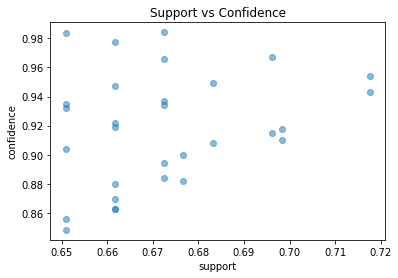

In [18]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

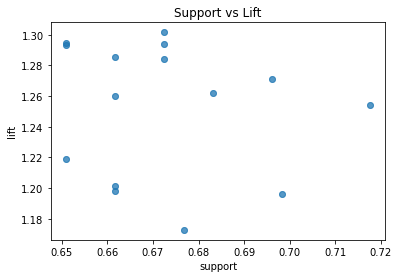

In [19]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

# Connected symptoms visualization

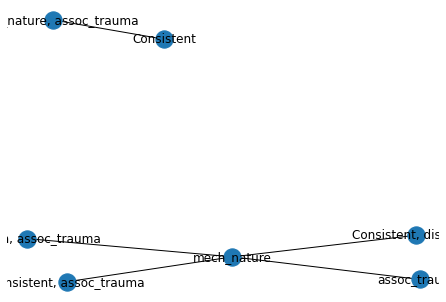

In [20]:
import networkx as nx 
# importing matplotlib.pyplot 
import matplotlib.pyplot as plt 
  
g = nx.Graph() 
  
g.add_edge ('Consistent, assoc_trauma', 'mech_nature')
g.add_edge('disp_pain, assoc_trauma', 'mech_nature')
g.add_edge('Consistent, disp_pain', 'mech_nature') 
g.add_edge('assoc_trauma','mech_nature') 
g.add_edge('mech_nature, assoc_trauma', 'Consistent')

  
nx.draw(g, with_labels = True)

# Logistic Regression implementation

In terms of Central Sensitization (CN)

In [21]:
data_CN = pd.read_csv('Data_CN1.csv')

In [22]:
data_CN.head()

,recent_pain,assoc_trauma,nerve_injury_history,X4,disp_pain,intermitt,burning,localised,referred,widespread,...,non_mechanical,pos_neurological,local_palpation,Diffuse,allodynia,hyperalgesia,hyperpathia,palpation_neural_tissues,identification_psychosocial,assignedlabels
0,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
3,0,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data_CN.tail(50)

,recent_pain,assoc_trauma,nerve_injury_history,X4,disp_pain,intermitt,burning,localised,referred,widespread,...,non_mechanical,pos_neurological,local_palpation,Diffuse,allodynia,hyperalgesia,hyperpathia,palpation_neural_tissues,identification_psychosocial,assignedlabels
414,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
415,1,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
416,0,1,0,0,0,0,1,1,1,0,...,0,0,1,0,0,1,0,1,0,0
417,1,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
418,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
419,1,1,1,0,1,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
420,1,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
421,0,1,1,0,0,1,1,1,1,0,...,0,0,1,0,0,0,0,1,0,0
422,1,0,1,0,1,1,1,0,1,0,...,1,0,1,0,0,0,0,0,0,1
423,1,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [24]:
data_CN.columns

Index(['recent_pain', 'assoc_trauma', 'nerve_injury_history', 'X4',
       'disp_pain', 'intermitt', 'burning', 'localised', 'referred',
       'widespread', 'mech_nature', 'mech_movement', 'disproportionate',
       'spont', 'dyesthesias', 'high_sev', 'neurological_symp', 'night_pain',
       'NSAIDS', 'rapid_resolve', 'pain_persist', 'history_failed',
       'psychosocial', 'functional', 'Antalgic', 'Consistent',
       'compress_neural_tissue', 'non_mechanical', 'pos_neurological',
       'local_palpation', 'Diffuse', 'allodynia', 'hyperalgesia',
       'hyperpathia', 'palpation_neural_tissues',
       'identification_psychosocial', 'assignedlabels'],
      dtype='object')

In [25]:
data_CN.shape

(464, 37)

## For simplicity, I am using only two features. This can be extend upto 37 features.

In [26]:
features = data_CN [['recent_pain','assoc_trauma']]

In [27]:
X = data_CN[::-1]
Y = data_CN.assignedlabels

#P = data_CN[::-20]

In [28]:
features.shape

(464, 2)

In [29]:
Y.shape

(464,)

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [32]:
model.fit(features, Y)


LogisticRegression(random_state=0, solver='liblinear')

In [33]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(features, Y)


In [34]:
model.intercept_

array([1.06860222])

## Model Accuracy

In [35]:
model.score(features, Y)

0.9310344827586207

In [36]:
confusion_matrix(Y, model.predict(features))

array([[330,  28],
       [  4, 102]])

In [37]:
print(classification_report(Y, model.predict(features)))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       358
           1       0.78      0.96      0.86       106

    accuracy                           0.93       464
   macro avg       0.89      0.94      0.91       464
weighted avg       0.94      0.93      0.93       464



In [38]:
#Improve the model
model = LogisticRegression(solver='liblinear', C=20.0, random_state=0)
model.fit(features, Y)


LogisticRegression(C=20.0, random_state=0, solver='liblinear')

In [39]:
model.score(features, Y)

0.9310344827586207

In [40]:
print(classification_report(Y, model.predict(features)))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       358
           1       0.78      0.96      0.86       106

    accuracy                           0.93       464
   macro avg       0.89      0.94      0.91       464
weighted avg       0.94      0.93      0.93       464



## Checking our model with different inputs

In [41]:
new_input = [[1,0]]
# get prediction for new input
new_output = model.predict(new_input)
# summarize input and output
print(new_input, new_output)

[[1, 0]] [1]


## Logistic Regresstion Analysis in terms of Statistics

##### Fort this approach, 37 features were considered.

In [42]:
import statsmodels.api as sm

In [43]:
P = list(Y)
model = sm.Logit(P, X)

In [44]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.473908
         Iterations 7


In [45]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  464
Model:                          Logit   Df Residuals:                      427
Method:                           MLE   Df Model:                           36
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:                  0.1181
Time:                        11:51:56   Log-Likelihood:                -219.89
converged:                       True   LL-Null:                       -249.35
Covariance Type:            nonrobust   LLR p-value:                  0.009346
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
recent_pain                    -0.1273      0.358     -0.356      0.722      -0.829       0.575
assoc_trauma                   -0.3217      0.686     -0.469      0.639      -1.667       1.023
nerve_injury_history           -0.1123      0.490     -0.229      0.819      -1.073       0.849
X4                             -0.1901      0.710     -0.268      0.789      -1.583       1.202
disp_pain                       0.2406      0.575      0.419      0.675      -0.886       1.367
intermitt                       0.4741      0.628      0.754      0.451      -0.758       1.706
burning                        -0.4856      0.324     -1.499      0.134      -1.120       0.149
localised                       0.4030      0.450      0.895      0.371      -0.479       1.285
referred                       -1.3163      0.548     -2.403      0.016      -2.390      -0.243
widespread                      0.4200      0.737      0.570      0.569      -1.024       1.864
mech_nature                    -0.7832      0.731     -1.071      0.284      -2.217       0.650
mech_movement                   0.5276      0.576      0.916      0.360      -0.601       1.656
disproportionate               -0.2898      0.993     -0.292      0.770      -2.237       1.657
spont                           0.3987      0.330      1.209      0.226      -0.247       1.045
dyesthesias                     0.3414      0.383      0.891      0.373      -0.409       1.092
high_sev                       -0.1793      0.520     -0.345      0.730      -1.199       0.840
neurological_symp               0.4615      0.393      1.175      0.240      -0.308       1.231
night_pain                     -0.2097      0.272     -0.771      0.441      -0.743       0.324
NSAIDS                         -0.8056      0.273     -2.952      0.003      -1.340      -0.271
rapid_resolve                   0.4156      0.354      1.173      0.241      -0.279       1.110
pain_persist                   -0.1492      0.367     -0.407      0.684      -0.868       0.569
history_failed                  1.0118      0.336      3.013      0.003       0.354       1.670
psychosocial                   -0.2151      0.543     -0.396      0.692      -1.280       0.850
functional                      0.1087      0.400      0.272      0.786      -0.674       0.892
Antalgic                       -0.1766      0.338     -0.523      0.601      -0.839       0.486
Consistent                      0.1808      0.560      0.323      0.747      -0.917       1.278
compress_neural_tissue          0.0039      0.437      0.009      0.993      -0.852       0.860
non_mechanical                 -1.2281      0.842     -1.459      0.145      -2.878       0.422
pos_neurological                0.0227      0.462      0.049      0.961      -0.883       0.929
local_palpation                -0.2144      0.338     -0.635      0.526      -0.876       0.448
Diffuse                         0.0837      0.647      0.129      0.897  

In [46]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:                   Logit               Pseudo R-squared:    0.118    
Dependent Variable:      y                   AIC:                 513.7870 
Date:                    2020-06-19 11:51    BIC:                 666.9628 
No. Observations:        464                 Log-Likelihood:      -219.89  
Df Model:                36                  LL-Null:             -249.35  
Df Residuals:            427                 LLR p-value:         0.0093457
Converged:               1.0000              Scale:               1.0000   
No. Iterations:          7.0000                                            
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
recent_pain                 -0.1273   0.3582 -0.3555 0.7222 -0.8294  0.5747
assoc_trauma                -0.3217   0.6862 -0.4688 0.6392 -1.6666  1.0232
nerve_injury_history        -0.1123   0.4903 -0.2290 0.8188 -1.0733  0.8487
X4                          -0.1901   0.7105 -0.2675 0.7891 -1.5826  1.2024
disp_pain                    0.2406   0.5746  0.4188 0.6754 -0.8856  1.3669
intermitt                    0.4741   0.6285  0.7544 0.4506 -0.7577  1.7059
burning                     -0.4856   0.3239 -1.4993 0.1338 -1.1204  0.1492
localised                    0.4030   0.4500  0.8954 0.3706 -0.4791  1.2850
referred                    -1.3163   0.5477 -2.4033 0.0162 -2.3898 -0.2428
widespread                   0.4200   0.7369  0.5700 0.5687 -1.0242  1.8643
mech_nature                 -0.7832   0.7314 -1.0708 0.2843 -2.2167  0.6503
mech_movement                0.5276   0.5759  0.9161 0.3596 -0.6011  1.6563
disproportionate            -0.2898   0.9932 -0.2918 0.7704 -2.2365  1.6569
spont                        0.3987   0.3296  1.2094 0.2265 -0.2474  1.0447
dyesthesias                  0.3414   0.3831  0.8911 0.3729 -0.4095  1.0922
high_sev                    -0.1793   0.5203 -0.3446 0.7304 -1.1990  0.8404
neurological_symp            0.4615   0.3929  1.1747 0.2401 -0.3085  1.2315
night_pain                  -0.2097   0.2721 -0.7706 0.4409 -0.7430  0.3236
NSAIDS                      -0.8056   0.2729 -2.9523 0.0032 -1.3404 -0.2708
rapid_resolve                0.4156   0.3544  1.1727 0.2409 -0.2790  1.1103
pain_persist                -0.1492   0.3666 -0.4070 0.6840 -0.8677  0.5693
history_failed               1.0118   0.3359  3.0127 0.0026  0.3536  1.6701
psychosocial                -0.2151   0.5433 -0.3959 0.6922 -1.2800  0.8498
functional                   0.1087   0.3995  0.2720 0.7857 -0.6744  0.8917
Antalgic                    -0.1766   0.3379 -0.5226 0.6013 -0.8390  0.4858
Consistent                   0.1808   0.5600  0.3228 0.7468 -0.9168  1.2783
compress_neural_tissue       0.0039   0.4369  0.0089 0.9929 -0.8525  0.8603
non_mechanical              -1.2281   0.8418 -1.4588 0.1446 -2.8780  0.4219
pos_neurological             0.0227   0.4623  0.0491 0.9609 -0.8834  0.9287
local_palpation             -0.2144   0.3377 -0.6348 0.5256 -0.8763  0.4476
Diffuse                      0.0837   0.6468  0.1294 0.8971 -1.1840  1.3514
allodynia                   -0.7981   0.6629 -1.2040 0.2286 -2.0973  0.5011
hyperalgesia                -0.0250   0.3191 -0.0784 0.9375 -0.6504  0.6003
hyperpathia                  0.8050   0.3331  2.4169 0.0157  0.1522  1.4579
palpation_neural_tissues    -0.4319   0.3969 -1.0882 0.2765 -1.2099  0.3460
identification_psychosocial -0.5296   0.5109 -1.0366 0.2999 -1.5309  0.4717
assignedlabels              -0.9793   0.9046 -1.0826 0.2790 -2.7523  0.7937
===========================================================================

"""

In [47]:
# Odd ratio

print (np.exp(result.params))


recent_pain                    0.880429
assoc_trauma                   0.724919
nerve_injury_history           0.893773
X4                             0.826889
disp_pain                      1.272072
intermitt                      1.606559
burning                        0.615331
localised                      1.496254
referred                       0.268119
widespread                     1.521984
mech_nature                    0.456940
mech_movement                  1.694819
disproportionate               0.748388
spont                          1.489850
dyesthesias                    1.406857
high_sev                       0.835860
neurological_symp              1.586438
night_pain                     0.810841
NSAIDS                         0.446840
rapid_resolve                  1.515312
pain_persist                   0.861405
history_failed                 2.750638
psychosocial                   0.806439
functional                     1.114775
Antalgic                       0.838115


In [48]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

                                 2.5%     97.5%        OR
recent_pain                  0.436329  1.776537  0.880429
assoc_trauma                 0.188889  2.782093  0.724919
nerve_injury_history         0.341874  2.336626  0.893773
X4                           0.205439  3.328209  0.826889
disp_pain                    0.412448  3.923328  1.272072
intermitt                    0.468744  5.506271  1.606559
burning                      0.326157  1.160889  0.615331
localised                    0.619348  3.614734  1.496254
referred                     0.091646  0.784406  0.268119
widespread                   0.359071  6.451189  1.521984
mech_nature                  0.108964  1.916166  0.456940
mech_movement                0.548207  5.239644  1.694819
disproportionate             0.106828  5.242848  0.748388
spont                        0.780830  2.842683  1.489850
dyesthesias                  0.664009  2.980753  1.406857
high_sev                     0.301500  2.317286  0.835860
neurological_s

## Implementation of K Means Clustering


#### FIrstly, we have defined that num of clusters will be 3. But we have to find the optimal num of clusters

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(data_CN)

KMeans(n_clusters=3)

#### Now, we are calculating the centroids of these clusters

In [50]:
labels = kmeans.predict(data_CN)
centroids = kmeans.cluster_centers_
centroids

array([[ 1.99170124e-01,  9.12863071e-01,  8.71369295e-02,
         7.05394191e-02,  9.25311203e-01,  5.39419087e-02,
         1.65975104e-01,  9.54356846e-01,  7.46887967e-02,
         1.65975104e-02,  9.70954357e-01,  3.31950207e-02,
         1.65975104e-02,  1.32780083e-01,  4.56431535e-02,
         2.90456432e-02,  1.07883817e-01,  3.31950207e-01,
         7.46887967e-01,  4.06639004e-01,  3.98340249e-01,
         1.78423237e-01,  1.07883817e-01,  7.46887967e-02,
         1.45228216e-01,  9.46058091e-01,  9.95850622e-02,
         4.14937759e-03,  4.14937759e-02,  8.50622407e-01,
         2.48962656e-02,  1.65975104e-02,  1.82572614e-01,
         1.61825726e-01,  5.80912863e-02,  1.24481328e-01,
         2.48962656e-02],
       [ 2.97029703e-02,  1.98019802e-02,  1.58415842e-01,
         8.91089109e-01,  2.47524752e-01,  7.72277228e-01,
         5.54455446e-01,  3.16831683e-01,  1.08910891e-01,
         6.73267327e-01,  5.94059406e-02,  5.94059406e-02,
         9.10891089e-01,  4.35

#### Plotting them by using only for visual basis.

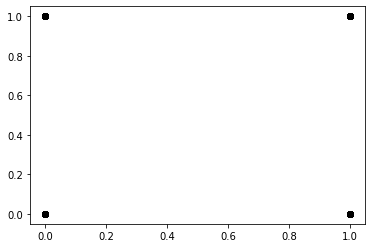

In [51]:
X = data_CN[["recent_pain","nerve_injury_history"]]
#'recent_pain', 'assoc_trauma', 'nerve_injury_history', 'X4','disp_pain'
#Visualse data points
plt.scatter(X["recent_pain"],X["nerve_injury_history"],c='black')
plt.show()

### Now, plotting them by using k means clustering methods

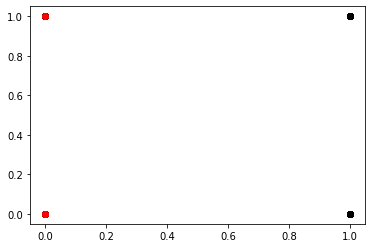

In [52]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=5

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["recent_pain"],X["nerve_injury_history"],c='black')
plt.scatter(Centroids["recent_pain"],Centroids["nerve_injury_history"],c='red')
plt.show()

# KMeans algorithm implementation

In [53]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["recent_pain"]-row_d["recent_pain"])**2
            d2=(row_c["nerve_injury_history"]-row_d["nerve_injury_history"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["nerve_injury_history","recent_pain"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['nerve_injury_history'] - Centroids['nerve_injury_history']).sum() + (Centroids_new['recent_pain'] - Centroids['recent_pain']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["nerve_injury_history","recent_pain"]]

<ipython-input-53-425dec903a14>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-53-425dec903a14>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


-0.14102564102564102
0.0


In [54]:
#color=['blue','green','cyan']
#for k in range(K):
 #   data=X[X["Cluster"]==k+1]
  #  plt.scatter(data["recent_pain"],data["nerve_injury_history"],c=color[k])
#plt.scatter(Centroids["recent_pain"],Centroids["nerve_injury_history"],c='red')
#plt.xlabel('Income')
#plt.ylabel('Loan Amount (In Thousands)')
#plt.show()

### Dataset transformation 

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_CN)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
count,464.000000,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,464.000000,4.640000e+02,4.640000e+02,464.000000,464.000000,...,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,464.000000,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02
mean,0.000000,3.828355e-18,3.062684e-17,-4.594026e-17,-6.891039e-17,0.000000,-2.009887e-17,4.594026e-17,0.000000,0.000000,...,-6.125368e-17,9.188053e-17,6.125368e-17,5.359697e-17,-1.914178e-17,0.000000,-1.033656e-16,1.531342e-17,3.062684e-17,-5.359697e-17
std,1.001079,1.001079e+00,1.001079e+00,1.001079e+00,1.001079e+00,1.001079,1.001079e+00,1.001079e+00,1.001079,1.001079,...,1.001079e+00,1.001079e+00,1.001079e+00,1.001079e+00,1.001079e+00,1.001079,1.001079e+00,1.001079e+00,1.001079e+00,1.001079e+00
min,-0.421503,-1.602882e+00,-6.979824e-01,-5.673952e-01,-1.815571e+00,-0.550791,-7.674901e-01,-1.513532e+00,-0.670820,-0.432089,...,-4.905525e-01,-5.241424e-01,-1.513532e+00,-4.735762e-01,-3.154775e-01,-0.660706,-5.341522e-01,-5.341522e-01,-6.439209e-01,-5.441410e-01
25%,-0.421503,-1.602882e+00,-6.979824e-01,-5.673952e-01,5.507911e-01,-0.550791,-7.674901e-01,-1.513532e+00,-0.670820,-0.432089,...,-4.905525e-01,-5.241424e-01,-1.513532e+00,-4.735762e-01,-3.154775e-01,-0.660706,-5.341522e-01,-5.341522e-01,-6.439209e-01,-5.441410e-01
50%,-0.421503,6.238762e-01,-6.979824e-01,-5.673952e-01,5.507911e-01,-0.550791,-7.674901e-01,6.607061e-01,-0.670820,-0.432089,...,-4.905525e-01,-5.241424e-01,6.607061e-01,-4.735762e-01,-3.154775e-01,-0.660706,-5.341522e-01,-5.341522e-01,-6.439209e-01,-5.441410e-01
75%,-0.421503,6.238762e-01,1.432701e+00,-5.673952e-01,5.507911e-01,-0.550791,1.302948e+00,6.607061e-01,1.490712,-0.432089,...,-4.905525e-01,-5.241424e-01,6.607061e-01,-4.735762e-01,-3.154775e-01,1.513532,-5.341522e-01,-5.341522e-01,1.552986e+00,-5.441410e-01
max,2.372461,6.238762e-01,1.432701e+00,1.762440e+00,5.507911e-01,1.815571,1.302948e+00,6.607061e-01,1.490712,2.314339,...,2.038518e+00,1.907878e+00,6.607061e-01,2.111593e+00,3.169798e+00,1.513532,1.872126e+00,1.872126e+00,1.552986e+00,1.837759e+00


In [56]:
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

## Finding out the inertia value to select the optimal num ber clusters

In [57]:
kmeans.inertia_


11995.517029970075

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.war

Text(0, 0.5, 'Inertia')

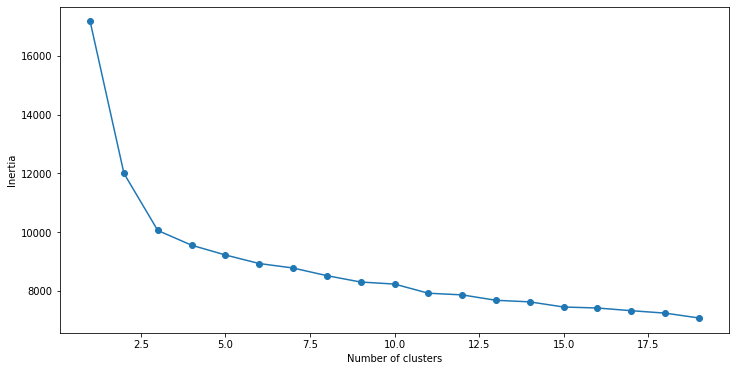

In [58]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#### As we can see that, the interia value 11996. So, The optimal cluster numbers should be in range of 3 to 5 as they not changing much.

In [59]:
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


### Let's find out much many datapoints are in the clusters

In [60]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    122
1    122
0    109
3     68
4     43
Name: cluster, dtype: int64

# Visualization 

In [61]:
print(frame['cluster'])

0      1
1      2
2      1
3      0
4      2
      ..
459    1
460    1
461    2
462    2
463    2
Name: cluster, Length: 464, dtype: int32


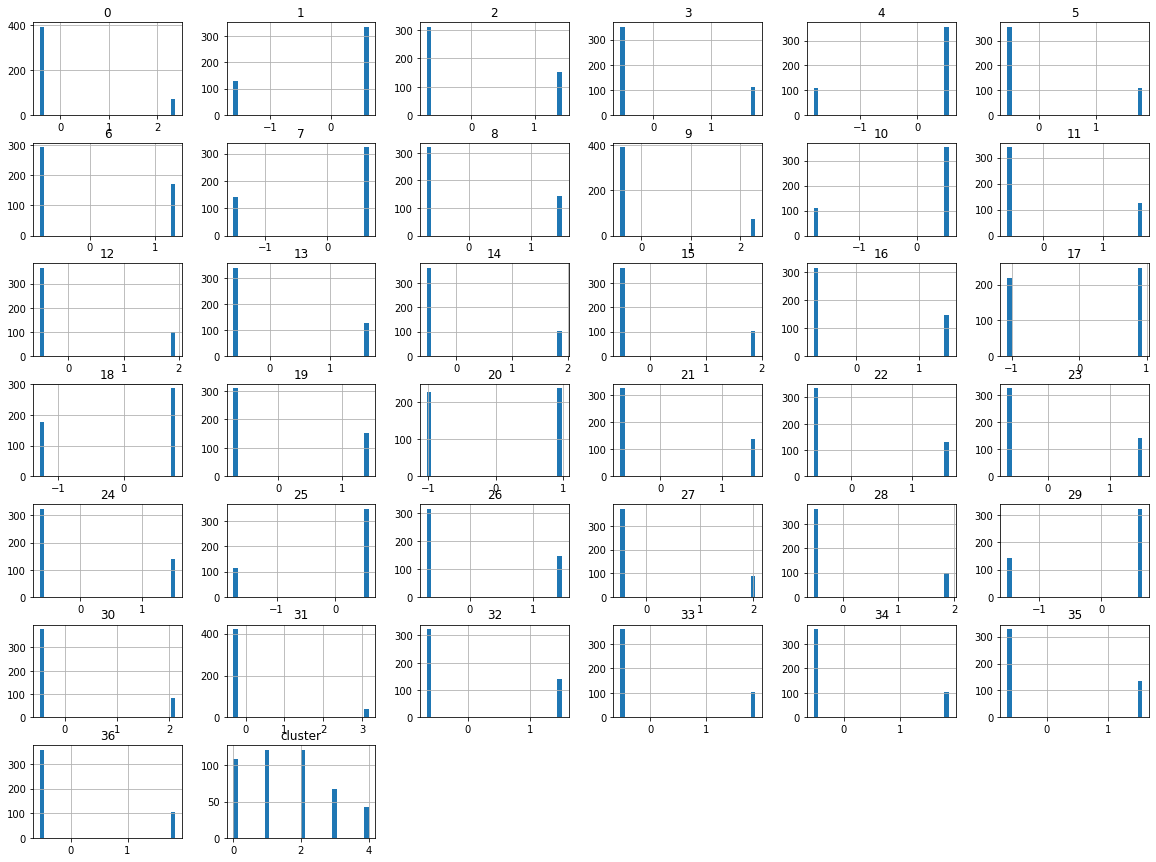

In [62]:
frame.hist(bins=30,figsize=(20,15))
plt.show()

In [63]:
#from pyclustering.cluster.clarans import clarans;
#from pyclustering.utils import timedcall;
#from sklearn import datasets

In [64]:
#print("A peek into the dataset : ",data[:37])

In [65]:
#clarans_instance = clarans(data_CN, 3, 6, 4);


In [66]:
#result = timedcall(clarans_instance.process);
#print("Execution time : ", ticks, "\n");

In [67]:
#clusters = clarans_instance.get_clusters();


In [68]:
#medoids = clarans_instance.get_medoids();


In [69]:
#print("Index of the points that are in a cluster : ",clusters)
#print("The target class of each datapoint : ",data_CN.assignedlabels)
#print("The index of medoids that algorithm found to be best : ",medoids)

In [70]:
'''

# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.preprocessing import scale
# define dataset
point = scale(X)
last = pd.DataFrame(Y)
point[0:10,]
'''

'\n\n# k-means clustering\nfrom numpy import unique\nfrom numpy import where\nfrom sklearn.datasets import make_classification\nfrom sklearn.cluster import KMeans\nfrom matplotlib import pyplot\nfrom sklearn.preprocessing import scale\n# define dataset\npoint = scale(X)\nlast = pd.DataFrame(Y)\npoint[0:10,]\n'

In [71]:
'''

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)


clustering = KMeans(n_clusters=2, random_state=5)
clustering.fit(point)
'''

'\n\nfrom sklearn.cluster import KMeans\nkmeans = KMeans(n_clusters=2)\n\n\nclustering = KMeans(n_clusters=2, random_state=5)\nclustering.fit(point)\n'

In [72]:
#kmeans.fit(point)


In [73]:
#centroids = kmeans.cluster_centers_

In [74]:
#clusters

In [75]:
#y_km = kmeans.fit_predict(point)

In [76]:
#y_km

In [77]:
#centroids = kmeans.cluster_centers_


In [78]:
#fig = plt.figure(figsize=(5, 5))

#colors = map(lambda x: colmap[x+1], y_km)

#plt.scatter(X, Y, color=colors, alpha=0.5, edgecolor='k')
#for idx, centroid in enumerate(centroids):
 #   plt.scatter(*centroid, color=colmap[idx+1])
#plt.xlim(0, 80)
#plt.ylim(0, 80)
#plt.show()

In [79]:
#plt.scatter(point[0],point[1],s =60, color='red')
#plt.scatter(point[y_km == 1,0],point[y_km == 1,1],s =30, color='blue')